# Week 3 Homework - Jon Workman

In [505]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import svm, datasets, metrics
from sklearn import model_selection
%matplotlib inline

In [506]:
# load datafile
df = pd.read_csv('seattleWeather_1948-2017.csv').dropna()

In [507]:
# Clean data
df.RAIN = df.RAIN.astype(int)
df['DATE'] =  pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [508]:
# check features
df.head(2)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1


In [509]:
%%capture
# Create average precipitation for last 2 days feature
df['average_PRCP'] = df['PRCP'].rolling(2).mean().round(2)
df.dropna(axis=0, how='all')

In [510]:
df['average_PRCP'].isnull()
df['average_PRCP'].dropna(how='any')

1        0.53
2        0.50
3        0.37
4        0.24
5        0.31
6        0.42
7        0.22
8        0.08
9        0.43
10       0.38
11       0.01
12       0.00
13       0.00
14       0.00
15       0.00
16       0.00
17       0.00
18       0.00
19       0.00
20       0.00
21       0.11
22       0.11
23       0.05
24       0.05
25       0.00
26       0.00
27       0.00
28       0.11
29       0.13
30       0.12
         ... 
25521    0.25
25522    0.31
25523    0.08
25524    0.00
25525    0.29
25526    0.60
25527    0.88
25528    0.83
25529    0.36
25530    0.10
25531    0.10
25532    0.22
25533    0.12
25534    0.34
25535    0.34
25536    0.13
25537    0.27
25538    0.53
25539    0.42
25540    0.02
25541    0.00
25542    0.00
25543    0.00
25544    0.00
25545    0.00
25546    0.00
25547    0.00
25548    0.00
25549    0.00
25550    0.00
Name: average_PRCP, Length: 25547, dtype: float64

In [511]:
df.isnull().sum()

DATE            0
PRCP            0
TMAX            0
TMIN            0
RAIN            0
average_PRCP    1
dtype: int64

In [512]:
df1 = df[df.isnull().any(axis=1)]
df1

,DATE,PRCP,TMAX,TMIN,RAIN,average_PRCP
0,1948-01-01,0.47,51,42,1,NaN


In [513]:
df.drop(df.index[0], inplace=True)

In [514]:
df1 = df[df.isnull().any(axis=1)]
df1

,DATE,PRCP,TMAX,TMIN,RAIN,average_PRCP


In [515]:
# Split dataset into train and test
start1 = pd.datetime(1950, 1, 1)
end1 = pd.datetime(2009, 12, 31)
start2 = pd.datetime(2010,1,1)
end2 = pd.datetime(2017,12,31)

df_train = df[(df.DATE >= start1) & (df.DATE <= end1)]
df_test = df[(df.DATE >= start2) & (df.DATE <= end2)]

In [516]:
df_train.shape

(21912, 6)

In [517]:
#df.drop(df_train.index[731:737], inplace=True)
feature_cols = ['TMAX','average_PRCP']

X = df_train[feature_cols]
y = df_train['RAIN']
X_test = df_test[feature_cols]
y_test = df_test['RAIN']

In [518]:
# calculate null accuracy
dumb = DummyClassifier(strategy='most_frequent') 
dumb.fit(X, y) 
y_dumb = dumb.predict(X_test) 
print ('Null accuracy is', metrics.accuracy_score(y_test, y_dumb))

Null accuracy is 0.552495697074


In [519]:
df_test = df_test.reset_index()
df_train = df_train.reset_index()

In [520]:
print(classification_report(y_test,logpredictions))

             precision    recall  f1-score   support

          0       0.78      0.92      0.84      1605
          1       0.87      0.67      0.76      1300

avg / total       0.82      0.81      0.81      2905



0.852323580034


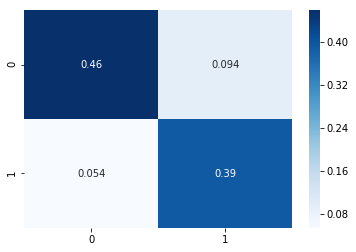

In [521]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X,y)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred) / len(y_test), cmap='Blues', annot=True)

             precision    recall  f1-score   support

          0       0.78      0.92      0.84      1605
          1       0.87      0.67      0.76      1300

avg / total       0.82      0.81      0.81      2905



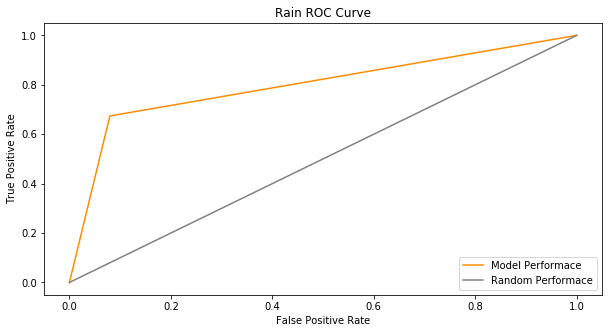

In [530]:
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig, ax = plt.subplots(1, figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rain ROC Curve')
plt.legend(loc="lower right")

In [532]:
logreg = LogisticRegression() 
logreg.fit(X, y)

# Predict with test data

y_pred1 = logreg.predict(X_test) 
print ('Accuracy of model (prediction with X_test)', metrics.accuracy_score(y_test, logpredictions))

Accuracy of model (prediction with X_test) 0.809982788296


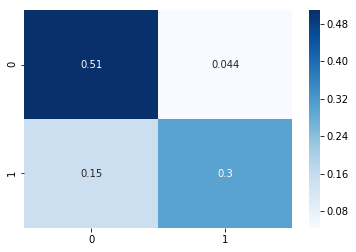

In [533]:
logmodel = LogisticRegression()
logmodel.fit(X,y)
logpredictions = logmodel.predict(X_test)
sns.heatmap(confusion_matrix(y_test, logpredictions) / len(y_test), cmap='Blues', annot=True)

In [534]:
print(classification_report(y_test,logpredictions))

             precision    recall  f1-score   support

          0       0.78      0.92      0.84      1605
          1       0.87      0.67      0.76      1300

avg / total       0.82      0.81      0.81      2905

